# Introduction
Authorship attribution

In [65]:
import os
import textwrap
import cltk

In [66]:
#pip install -i https://pypi.tuna.tsinghua.edu.cn/simple cltk


In [67]:
os.listdir('./raw text')
def get_corpus_dict_from_dir(path):
    files = os.listdir('./raw text')
    corpus_dict = {}
    for file in files:
        if '.txt' in file:
            author = file[:file.find('-')-1].strip()
            with open(path+'/'+file,'r',encoding='utf-8') as f:
                if corpus_dict.get(author) is None:
                    corpus_dict[author] = []
                corpus_dict[author].append(f.read())
    return corpus_dict

In [68]:
corpus_dict = get_corpus_dict_from_dir('./raw text')

In [69]:
for author,docs in corpus_dict.items():
    print(author, ' has ', len(docs),' text')

Epicurus  has  2  text
Pausanias  has  1  text
Plato  has  8  text
Xenophon  has  14  text
Aristotle  has  8  text
Aristophanes  has  8  text
Saint John  has  4  text
Luke  has  2  text
Diogenes Laërtius  has  1  text


In [70]:
len(corpus_dict.keys())

9

# II. Implementation

## 5. Preprocessing

### Stopwords Removal

In [71]:
import csv
with open('stopwords.csv','w') as f:
    writer = csv.writer(f, delimiter=',',
                    quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['stopwords'])
    for word in grc_stoplist:
        writer.writerow([word])

In [72]:
import csv
grc_stoplist=[]
with open('stopwords.csv','r') as f:
    reader = csv.reader(f, delimiter=',',
                    quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in reader:
        if line[0] == 'stopwords':
            continue;
        grc_stoplist.append(line[0])
grc_stoplist[:10]

['αὐτὸς', 'αὐτός', 'γε', 'γὰρ', 'γάρ', "δ'", 'δαὶ', 'δαὶς', 'δαί', 'δαίς']

In [73]:
# remove stopwords
# grc_stoplist = cltk.stops.grc.STOPS
# grc_stoplist.extend(['να','και','το','τα','θα','τον','που','την','μου','τη','από','για',
#                     'κι','με','εις','του','είναι','των','της','ἦν','τους','τοῦτο','ταῦτα','ἐγώ',
#                     'δ\'','δ᾽','δ’','σου','ἀλλ᾽','ἀλλ’','ἀλλά','ότι','δε','ο','η'])


In [74]:

# import nltk
# import textwrap
# corpus_dict = get_corpus_dict_from_dir('./raw text')

# import re
# for author in corpus_dict.keys():
#     for i in range(len(corpus_dict[author])):
#         corpus_dict[author][i] = re.sub('[0-9]','',corpus_dict[author][i])
#         corpus_dict[author][i] = re.sub("[\\[\\]!._,@?\\\:;\`’\\(\\)\\%]",'',corpus_dict[author][i])
#         corpus_dict[author][i] = re.sub("[\\n]",' ',corpus_dict[author][i])
        
# #textwrap.wrap(cdict['Aristotle'][0], 5000)[0]
# corpus = {}
# chunk_size = 5000

# for author,docs in corpus_dict.items():
#     for doc in docs:
#         if corpus.get(author) is None:
#             corpus[author] = []
#         corpus[author] += textwrap.wrap(doc,chunk_size)
# aristophanes_corpus_string = ''
# for doc in corpus['Aristophanes']:
#     aristophanes_corpus_string+=doc
# aristophanes_words = greek_tokenizer(aristophanes_corpus_string)
# clean_aristophanes_words = [word for word in aristophanes_words if word not in grc_stoplist]
# aristophanes_freq_dist = nltk.probability.FreqDist(clean_aristophanes_words)
# aristophanes_freq_dist.most_common(50)

### Tokenizer

In [75]:
import nltk
def greek_tokenizer(text):
    processed_text = text.replace('ἀλλ’','tk_1')
    processed_text = processed_text.replace('ἀλλ\'','tk_1')
    
    processed_text = processed_text.replace('δ’','tk_2')
    processed_text = processed_text.replace('δ\'','tk_2')

    words = nltk.word_tokenize(processed_text,language='greek')
    for i in range(len(words)):
        if words[i] == 'tk_1':
            words[i] ='ἀλλ’'
            continue
        if words[i] == 'tk_2':
            words[i] ='δ’'
            continue
    return words

In [76]:
# import re
# for author in corpus_dict.keys():
#     for i in range(len(corpus_dict[author])):
#         corpus_dict[author][i] = re.sub('[0-9]','',corpus_dict[author][i])
#         corpus_dict[author][i] = re.sub("[\\[\\]!._,'@?\\\:;\`’\\(\\)\\%]",'',corpus_dict[author][i])
#         corpus_dict[author][i] = re.sub("[\\n]",' ',corpus_dict[author][i])
import re
for author in corpus_dict.keys():
    for i in range(len(corpus_dict[author])):
        corpus_dict[author][i] = re.sub('[0-9]','',corpus_dict[author][i])
        corpus_dict[author][i] = re.sub("[\\[\\]!._,'@?\\\:;\`’\\(\\)\\%\\—]",'',corpus_dict[author][i])
        corpus_dict[author][i] = re.sub("[\\n]",' ',corpus_dict[author][i])

In [77]:
for author in corpus_dict.keys():
    for i in range(len(corpus_dict[author])):
        corpus_dict[author][i] = corpus_dict[author][i].lower()

In [78]:
import textwrap
#textwrap.wrap(cdict['Aristotle'][0], 5000)[0]
corpus = {}
chunk_size = 5000

for author,docs in corpus_dict.items():
    for doc in docs:
        if corpus.get(author) is None:
            corpus[author] = []
        corpus[author] += textwrap.wrap(doc,chunk_size)

In [79]:
for author,docs in corpus.items():
    print(author, ' has ', len(docs),' text')

Epicurus  has  4  text
Pausanias  has  226  text
Plato  has  380  text
Xenophon  has  395  text
Aristotle  has  320  text
Aristophanes  has  113  text
Saint John  has  23  text
Luke  has  48  text
Diogenes Laërtius  has  140  text


### Undersampling

In [103]:
## Undersampling
import random

## Remove some samples from Plato's corpus
plato_corpus = corpus['Plato']
random.seed(1)
random.shuffle(plato_corpus)
corpus['Plato'] = plato_corpus[:250]

# Remove some from Aristotle's corpus
aristotle_corpus = corpus['Aristotle']
random.shuffle(aristotle_corpus)
corpus['Aristotle'] = aristotle_corpus[:250]

# Remove some from Aristotle's corpus
xenophon_corpus = corpus['Xenophon']
random.shuffle(xenophon_corpus)
corpus['Xenophon'] = xenophon_corpus[:250]

In [104]:
for author,docs in corpus.items():
    print(author, ' has ', len(docs),' text')

Epicurus  has  4  text
Pausanias  has  226  text
Plato  has  250  text
Xenophon  has  250  text
Aristotle  has  250  text
Aristophanes  has  113  text
Saint John  has  23  text
Luke  has  48  text
Diogenes Laërtius  has  140  text


#### Labels for the target data

In [82]:
def get_author_by_index(authors,index):
    return authors[index]


authors= list(corpus.keys())
authors

['Epicurus',
 'Pausanias',
 'Plato',
 'Xenophon',
 'Aristotle',
 'Aristophanes',
 'Saint John',
 'Luke',
 'Diogenes Laërtius']

### Training Data and Target Data

In [110]:
all_train_data = []
all_target_data = []
for author,docs in corpus.items():
    for doc in docs:
        all_train_data.append(doc)
        all_target_data.append(authors.index(author))
print('There are ', len(all_train_data),' data')

There are  1304  data


In [111]:
import re
## remove numbers
for i in range(len(all_train_data)):
    all_train_data[i] = re.sub('[0-9]','',all_train_data[i])
for i in range(len(all_train_data)):
    all_train_data[i] = re.sub("[\\[\\]!._,'@?\\\]",'',all_train_data[i])


In [121]:
from sklearn.utils import shuffle
all_train_data, all_target_data = shuffle(all_train_data, all_target_data, random_state=3)

In [122]:
train_data_boundary = int(len(all_train_data)/3 *2)
train_data = all_train_data[:train_data_boundary]
target_data = all_target_data[:train_data_boundary]
test_data = all_train_data[train_data_boundary:]
test_target_data=all_target_data[train_data_boundary:]

In [87]:
len(all_train_data)

1449

In [114]:
print('target: ',target_data[0])
print('This work is attributed to ',target_data[0],get_author_by_index(authors,target_data[0]))

target:  3
This work is attributed to  3 Xenophon


In [89]:
len(test_data)

483

## 7. Classification approach

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer(tokenizer=greek_tokenizer,stop_words=grc_stoplist)

TfidfVectorizer(stop_words=['αὐτὸς', 'αὐτός', 'γε', 'γὰρ', 'γάρ', "δ'", 'δαὶ',
                            'δαὶς', 'δαί', 'δαίς', 'διὰ', 'διά', 'δὲ', 'δέ',
                            'δὴ', 'δή', 'εἰ', 'εἰμὶ', 'εἰμί', 'εἰς', 'εἴμι',
                            'κατὰ', 'κατά', 'καὶ', 'καί', 'μετὰ', 'μετά', 'μὲν',
                            'μέν', 'μὴ', ...],
                tokenizer=<function greek_tokenizer at 0x7f23c1723ca0>)

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(tokenizer=greek_tokenizer,stop_words=grc_stoplist), MultinomialNB())


In [123]:
model.fit(train_data, target_data)
labels = model.predict(test_data)

## Performance of the model

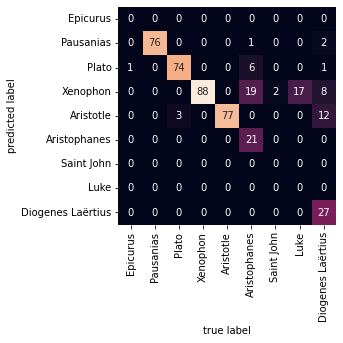

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_target_data, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=authors, yticklabels=authors)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [102]:
from sklearn.metrics import classification_report
print(classification_report(test_target_data, labels, target_names=authors))

                   precision    recall  f1-score   support

         Epicurus       0.00      0.00      0.00         3
        Pausanias       1.00      0.99      0.99        71
            Plato       1.00      0.66      0.80        89
         Xenophon       0.52      1.00      0.68       136
        Aristotle       0.90      0.68      0.78        92
     Aristophanes       1.00      0.29      0.45        34
       Saint John       0.00      0.00      0.00         6
             Luke       0.00      0.00      0.00        10
Diogenes Laërtius       1.00      0.29      0.44        42

         accuracy                           0.72       483
        macro avg       0.60      0.43      0.46       483
     weighted avg       0.81      0.72      0.70       483



/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ludwig/projects/CM3060 Natural Language Proccesing/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [95]:
len(set(labels))
a

6

In [96]:
authors

['Epicurus',
 'Pausanias',
 'Plato',
 'Xenophon',
 'Aristotle',
 'Aristophanes',
 'Saint John',
 'Luke',
 'Diogenes Laërtius']

In [ ]:
aristotle_sample = '''Διά τούτο σχεδόν οι πλείστοι των φιλοσοφούντων περί της φύσεως, και εκ των ιατρών εκείνοι, οίτινες αντιλαμβάνονται την τέχνην αυτών κατά τρόπον φιλοσοφικώτερον, εκείνοι μεν εκ της μελέτης της φύσεως καταντώσι τέλος εις την ιατρικήν, οι άλλοι δε αρχίζουσι την τέχνην εκ των νόμων της φύσεως και της εφαρμογής αυτών εις την ιατρικήν. 6. Ότι δε αι ρηθείσαι λειτουργίαι πάσαι είναι κοιναί και της ψυχής και του σώματος, είναι φανερόν. Διότι πάσαι συμβαίνουσιν, άλλαι ομού με την αίσθησιν {7} άλλαι δε διά της αισθήσεως {8}. Άλλαι μεν είναι παθήσεις της αισθήσεως, άλλαι δε είναι διαρκείς καταστάσεις αυτής, άλλαι είναι λειτουργίαι προς φύλαξιν και συντήρησιν αυτής {9} και άλλαι είναι φθοραί και στερήσεις αυτής {10}. Ότι δε η αίσθησις συμβαίνει εις την ψυχήν διά μέσου του σώματος, τούτο γίνεται φανερόν και διά του λόγου και άνευ του λόγου (διά της πείρας) {11}. 7. Αλλ' έχομεν είπει εν τη περί ψυχής πραγματεία τας θεωρίας ημών περί αισθήσεως και περί του αισθάνεσθαι και διατί συμβαίνει εις τα ζώα τούτο το πάθος. Έκαστον ζώον, καθό ζώον, πρέπει κατ' ανάγκην να έχη αίσθησιν• διά ταύτης διακρίνομεν το ζώον από παντός όπερ δεν είναι ζώον. 8. Πάντα δε τα ζώα, ατομικώς έκαστον έχουσιν εξ ανάγκης την αφήν και την γεύσιν, την μεν αφήν, διά την αιτίαν την οποίαν είπομεν εις την περί ψυχής πραγματείαν, {12} την δε γεύσιν διά την τροφήν. Διότι διά της γεύσεως διακρίνει το ευάρεστον και το δυσάρεστον εις τας τροφάς το ζώον, και ούτως αποφεύγει τας δυσάρεστους τροφάς, επιζητεί δε τας ευαρέστους, και εν γένει ο χυμός {13} είναι πάθος του θρεπτικού μέρους της ψυχής. 9. Αι δε αισθήσεις αι διεγειρόμεναι υπό των εξωτερικών πραγμάτων π.χ. η όσφρησις, η ακοή και η όψις, εις πάντα τα πορευτικά (κινούμενα) ζώα, τα έχοντα αυτάς, υπάρχουσι χάριν της συντηρήσεις των, όπως προαισθανόμενα την τροφήν επιδιώκωσιν αυτήν, φεύγωσι δε τα κακά και επιβλαβή. Εις δε τα ζώα, τα οποία έχουσι και νόησιν, αι αισθήσεις αυταί υπάρχουσι χάριν της ευζωίας• διότι γνωστοποιούσιν εις αυτά πολλάς διαφοράς των πραγμάτων, εξ ων προέρχεται η γνώσις εκείνων τα οποία δύνανται να νοηθώσι και εκείνων τα οποία πρέπει να πραχθώσι (των νοητών και των πρακτικών ιδεών). '''

In [ ]:
aristotle_sample_label = model.predict([aristotle_sample])
print(aristotle_sample_label)
print('This work is attributed to ',get_author_by_index(authors,aristotle_sample_label[0]))

In [ ]:
luke_sample = '''Ταῦτα δὲ αὐτῶν λαλούντων, αὐτὸς ὁ Ἰησοῦς ἔστη ἐν μέσῳ αὐτῶν, καὶ λέγει αὐτοῖς, Εἰρήνη ὑμῖν. 37 πτοηθέντες δὲ καὶ ἔμφοβοι γενόμενοι ἐδόκουν πνεῦμα θεωρεῖν. 38 καὶ εἶπεν αὐτοῖς, Τί τεταραγμένοι ἐστέ, καὶ διατί διαλογισμοὶ ἀναβαίνουσιν ἐν ταῖς καρδίαις ὑμῶν; 39 ἴδετε τὰς χεῖράς μου καὶ τοὺς πόδας μου, ὅτι αὐτὸς ἐγώ εἰμι· ψηλαφήσατέ με καὶ ἴδετε, ὅτι πνεῦμα σάρκα καὶ ὀστέα οὐκ ἔχει, καθὼς ἐμὲ θεωρεῖτε ἔχοντα. 40 καὶ τοῦτο εἰπὼν ἐπέδειξεν αὐτοῖς τὰς χεῖρας καὶ τοὺς πόδας. 41 ἔτι δὲ ἀπιστούντων αὐτῶν ἀπὸ τῆς χαρᾶς καὶ θαυμαζόντων, εἶπεν αὐτοῖς, Ἔχετέ τι βρώσιμον ἐνθάδε; 42 οἱ δὲ ἐπέδωκαν αὐτῷ ἰχθύος ὀπτοῦ μέρος, καὶ ἀπὸ μελισσίου κηρίου. 43 καὶ λαβὼν ἐνώπιον αὐτῶν ἔφαγεν.'''

In [ ]:
luke_sample_label = model.predict([luke_sample])
print(luke_sample_label)
print('This work is attributed to ',get_author_by_index(authors,luke_sample_label[0]))

In [ ]:
import nltk

aristophanes_corpus_string = ''
for doc in corpus['Aristophanes']:
    aristophanes_corpus_string+=doc
aristophanes_words = greek_tokenizer(aristophanes_corpus_string)
clean_aristophanes_words = [word for word in aristophanes_words if word not in grc_stoplist]
aristophanes_freq_dist = nltk.probability.FreqDist(clean_aristophanes_words)
aristophanes_freq_dist.most_common(50)

In [ ]:
import nltk
def greek_tokenizer(text):
    processed_text = text.replace('ἀλλ’','tk_1')
    processed_text = processed_text.replace("ἀλλ'",'tk_1')
    
    words = nltk.word_tokenize(processed_text,language='greek')
    for i in range(len(words)):
        if words[i] == 'tk_1':
            words[i] ='ἀλλ’'
            #print('replace')
    return words

In [ ]:
corpus_dict_2 = get_corpus_dict_from_dir('./raw text')
import textwrap
#textwrap.wrap(cdict['Aristotle'][0], 5000)[0]
corpus_2 = {}
chunk_size = 5000
count=0
for author,docs in corpus_dict_2.items():
    for doc in docs:
        if corpus_2.get(author) is None:
            corpus_2[author] = []
        corpus_2[author] += textwrap.wrap(doc,chunk_size)
for docs in corpus_2.values():
    for doc in docs:
        if 'η' in greek_tokenizer(doc):
            #print('find:',doc.replace('ἀλλ’','tk_1').replace("ἀλλ'",'tk_1'))
            #print(doc)
            count+=1
count



In [ ]:
swords =set()
for docs in corpus_2.values():
    for doc in docs:
        for w in greek_tokenizer(doc):
            #print('find:',doc.replace('ἀλλ’','tk_1').replace("ἀλλ'",'tk_1'))
            #print(doc)
            if len(w)<=1:
                swords.add(w)
swords

In [ ]:
plato_corpus_string = ''
for doc in corpus['Plato']:
    plato_corpus_string+=doc
plato_words = greek_tokenizer(plato_corpus_string)
clean_plato_words = [word for word in plato_words if word not in grc_stoplist]

plato_freq_dist = nltk.probability.FreqDist(clean_plato_words)
plato_freq_dist.plot(10)

In [ ]:
plato_freq_dist.most_common(300)

In [ ]:
plato_corpus_string[:2000]

In [ ]:
'Και'.lower()

## Dataset

Meno \
Μένων by Plato:\
https://www.gutenberg.org/ebooks/34881


Απολογία Σωκράτους \
Socrates' Apology, by Plato and Alexandros Moraitides:\
https://www.gutenberg.org/ebooks/39462

Πολιτεία, Τόμος 4 \
Republic Volume 4 (of 4), by Plato: \
https://www.gutenberg.org/ebooks/39530



Όρνιθες \
The Birds, by Aristophanes:\
https://www.gutenberg.org/ebooks/27315

Lysistrata\
Λυσιστράτη by Aristophanes: \
https://www.gutenberg.org/ebooks/17814

Τίμαιος, Τόμος \
Timaeus, by Plato \
https://www.gutenberg.org/ebooks/35453

Hippias\
Ελάσσων, by Plato\
https://www.gutenberg.org/ebooks/34880

Ηθικά Νικομάχεια, Τόμος Πρώτος \
Nicomachean Ethics, Volume 1, by Aristotle \
https://www.gutenberg.org/ebooks/28626

Αθηναίων Πολιτεία \
The Constitution of the Athenians, by Aristotle \
https://www.gutenberg.org/ebooks/39963

Περί Ψυχής \
On the Soul, by Aristoteles \
https://www.gutenberg.org/ebooks/27816